In [ ]:
#코랩 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
df=pd.read_csv('drive/My Drive/텍마팀플/DAJUNG_vlog_subtitle2.csv')

In [ ]:
df

,Unnamed: 0,Date,Title,IDS,subtitle,subtitle2
0,0,2021-05-23T12:53:00Z,"터프팅 러그 만들기 💛터프팅 러그 만드는 방법 | 취미생활 일상 브이로그, 셀프 인...",Vi57oKnUsSU,"['첫째날은 밑그림을 그리고, 앨리스를 완성했습니다 ☻', '터프팅을 시작한 이유는...","['첫째 날은 밑그림을 그리고, 앨리스를 완성했습니다 ☻', '터 퍼팅을 시작한 이..."
1,1,2021-05-02T13:28:22Z,"인테리어 소품 만들기 (자수 수틀 액자), 우리집 셀프 인테리어, 5월의 첫 브이로...",INK5vhS1NyQ,"['2021년을 2020년이라고 계속 실수한지도 어언 4개월...', '믿기지 않지...","['2021년을 2020년이라고 계속 실수한지도 어언 4개월...', '믿기지 않지..."
2,2,2021-04-25T11:08:11Z,"빈 벽은 못참지 💛 사진으로 방꾸미기, 벽꾸미기 인테리어 & 랜선 세계 여행 (wi...",WsvuBwe8DG8,"['[한국후지필름과의 두 번째 콜라보]', ""['소소일작 벽꾸챌린지' 관련하여, 후...","['[한국후지필름과의 두 번째 콜라보]', ""['소소일작 벽고 챌린지' 관련하여, ..."
3,3,2021-04-18T09:57:19Z,"봄, 여름 맞이 침실 새단장 💚 이번에는 녹색이다 (키티버니포니 침구, 커튼, 작은...",VmVBN0bsns4,"['벚꽃 비 내리는 어느 날,', '오늘도 어김없이 택배 뜯는 걸로 하루를 시작하는...","['벚꽃 비 내리는 어느 날,', '오늘도 어김없이 택배 뜯는 걸로 하루를 시작하는..."
4,4,2021-04-11T11:12:36Z,"1년차 프리랜서의 쉬는 날 일상, 아이패드와 굿노트로 계획적인 하루 살기 (레고 플...",U4cLUpHcQ3Q,"['[아침 산책]', '[아침 식사 요거트]', '[식물 돌보기]', '[점심식사...","['[아침 산책]', '[아침 식사 요구르트]', '[식물 돌보기]', '[점심 ..."
5,5,2021-02-21T11:53:20Z,일주일 일상 브이로그 ☻ | 남편과 떨어져 지낸 연휴 일주일 (동생 생일파티 해주기...,JAenAR7g1fw,"['[늘 다정하게]', '[나의 일주일, 연휴]', '[월요일]', '[음력 설, ...","['[늘 다정하게]', '[나의 일주일, 연휴]', '[월요일]', '[음력 설, ..."
6,6,2021-02-07T12:00:03Z,"다이어트는 저 멀리...🧋집에서 버블티 만들어 먹고, 닭발 먹고 집안일 하는 하루 ...",-vwJQp2Qzok,"['EVERYDAY DAJUNG\n[- 늘, 다정하게 -]', '[거의... 먹기만...","['EVERYDAY DAJUNG[- 늘, 다정하게 -]', '[거의... 먹기만 했..."
7,7,2021-01-31T12:12:04Z,"[SUB] 자유부인 하루 일상 브이로그 🍺 | 눈오리 만들기, 심야식당 참마소테, ...",sRBkjz7vk8s,"['[- 늘, 다정하게 -]', '[- 자유부인의 하루 2 -]', '[눈을 기다렸...","['[- 늘, 다정하게 -]', '[- 자유부인의 하루 2 -]', '[눈을 기다렸..."
8,8,2021-01-24T11:56:15Z,"[SUB] 일주일 일상 브이로그 🐻 | 프리랜서의 일주일, 나의 일주일을 공개합니다...",-K0dK9MJ7_U,"['[늘, 다정하게]', '[나의 일주일]', '[- 월요일 -]', '[눈이 많이...","['[늘, 다정하게]', '[나의 일주일]', '[- 월요일 -]', '[눈이 많이..."
9,9,2021-01-17T13:15:22Z,"룸투어, 내 방을 소개합니다 🦦 3평짜리 작은방 작업실 겸 취미방 꾸미기 | 방소개...",bt-S2E2iq7U,"['결혼을 하고 자기 방을 갖는 게 되게 어려운 일인데', '제가 아무래도 집에서 ...","['결혼을 하고 자기 방을 갖는 게 되게 어려운 일인데', '제가 아무래도 집에서 ..."


In [ ]:
! pip install konlpy

In [ ]:
import konlpy
from konlpy.tag import Kkma, Okt, Hannanum, Komoran
kkma = Kkma()
okt = Okt()
hannanum = Hannanum()
komoran = Komoran()

In [ ]:
import re
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[\[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [ ]:
#word2vec
vec = []
for text in df['subtitle']:
    vec2 = []
    cleantext = re.sub(emoji_pattern," ",text)
    cleantext = re.sub(han,"",cleantext)

    tm_ls = okt.nouns(cleantext)
    # tm_ls = [word for word in tm_ls if not word in stopwords] # 불용어 제거
    for j in range(len(tm_ls)): #비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
        if len(tm_ls[j]) > 1:
            vec2.append(tm_ls[j])
        else:
            pass
    vec.append(vec2)

noun_list = []
for i in vec:
  noun_list.extend(i)

In [ ]:
from collections import Counter

# 빈도수 계산
count = Counter(noun_list)

# 상위 30건 추출
print(count.most_common(30))

# 상위 100건 추출
most = count.most_common(100)

# 딕셔너리 구성
tags = {}
for n, c in most:
  tags[n] = c

[('오늘', 48), ('영상', 41), ('요즘', 35), ('사진', 35), ('하나', 32), ('완성', 31), ('다시', 31), ('동동', 30), ('시간', 29), ('이건', 28), ('크리스마스', 27), ('진짜', 26), ('여기', 26), ('시작', 25), ('식물', 25), ('선물', 25), ('구입', 25), ('이불', 25), ('그냥', 24), ('아침', 24), ('청소', 24), ('생각', 23), ('준비', 23), ('올해', 22), ('엄마', 21), ('사용', 21), ('겨울', 21), ('정리', 19), ('뭔가', 19), ('커튼', 19)]


In [ ]:
!pip install wordcloud

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic Eco


findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.


<Figure size 432x288 with 0 Axes>

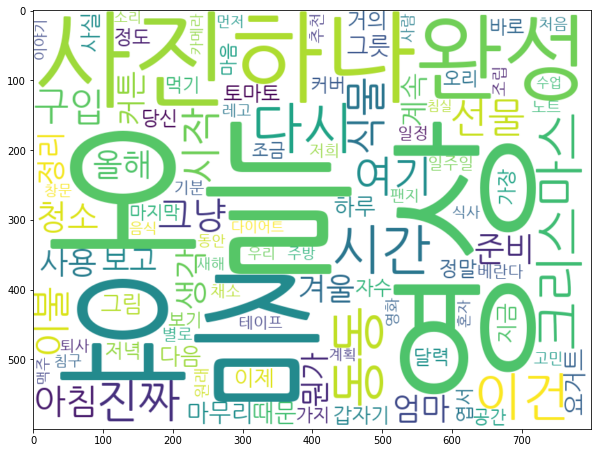

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(font_path="NanumGothic", background_color='white', width=800, height=600)
gen = wc.generate_from_frequencies(tags)
plt.figure()
plt.figure(figsize=(10, 8))
plt.imshow(gen, interpolation='bilinear')

In [ ]:
stopwords = ['오늘','영상','요즘','다시','하나','이건','진짜','여기','그냥','뭔가','계속']

#word2vec
vec = []
for text in df['subtitle']:
    vec2 = []
    cleantext = re.sub(emoji_pattern," ",text)
    cleantext = re.sub(han,"",cleantext)

    tm_ls = okt.nouns(cleantext)
    tm_ls = [word for word in tm_ls if not word in stopwords] # 불용어 제거
    for j in range(len(tm_ls)): #비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
        if len(tm_ls[j]) > 1:
            vec2.append(tm_ls[j])
        else:
            pass
    vec.append(vec2)

noun_list = []
for i in vec:
  noun_list.extend(i)

# 빈도수 계산
count = Counter(noun_list)

# 상위 30건 추출
print(count.most_common(30))

# 상위 100건 추출
most = count.most_common(100)

# 딕셔너리 구성
tags = {}
for n, c in most:
  tags[n] = c

[('사진', 35), ('완성', 31), ('동동', 30), ('시간', 29), ('크리스마스', 27), ('시작', 25), ('식물', 25), ('선물', 25), ('구입', 25), ('이불', 25), ('아침', 24), ('청소', 24), ('생각', 23), ('준비', 23), ('올해', 22), ('엄마', 21), ('사용', 21), ('겨울', 21), ('정리', 19), ('커튼', 19), ('보고', 19), ('마무리', 18), ('때문', 18), ('요거트', 18), ('그릇', 17), ('그림', 16), ('다음', 16), ('하루', 16), ('이제', 15), ('거의', 15)]


<Figure size 432x288 with 0 Axes>

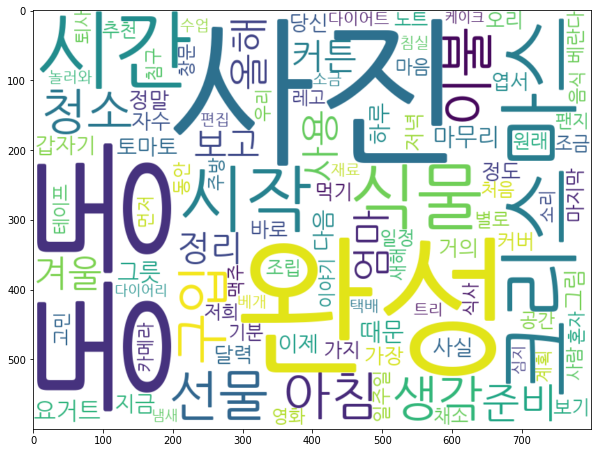

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(font_path="NanumGothic", background_color='white', width=800, height=600)
gen = wc.generate_from_frequencies(tags)
plt.figure()
plt.figure(figsize=(10, 8))
plt.imshow(gen, interpolation='bilinear')

**토픽 모델링**

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 12.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3MB 286kB/s 
     |████████████████████████████████| 9.9MB 173kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136897 sha256=f618ac3d5d967a60047c5d4ef1bc50364247649096a3140692d6188e924572a4
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [ ]:
tt = pd.DataFrame({'tokens':vec})
tokenized_doc = tt['tokens']
#단어 정수 인코딩&빈도수
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

In [ ]:
import gensim

# LDA 토픽 모델링 (num_topics: 토픽 수, passes: 반복훈련횟수)
NUM_TOPICS = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=10)
for topic in ldamodel.print_topics():
    print(topic)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

(0, '0.023*"사진" + 0.011*"식물" + 0.006*"완성" + 0.006*"엄마" + 0.006*"심지" + 0.006*"마무리" + 0.005*"올해" + 0.005*"자수" + 0.005*"베란다" + 0.005*"시간"')
(1, '0.013*"크리스마스" + 0.010*"선물" + 0.008*"동동" + 0.007*"시간" + 0.006*"사용" + 0.006*"생각" + 0.005*"퇴사" + 0.005*"노트" + 0.005*"사실" + 0.005*"청소"')
(2, '0.008*"달력" + 0.008*"동동" + 0.006*"아침" + 0.006*"채소" + 0.006*"청소" + 0.005*"시작" + 0.005*"올해" + 0.005*"요거트" + 0.005*"정리" + 0.005*"엄마"')
(3, '0.012*"커튼" + 0.012*"겨울" + 0.011*"이불" + 0.009*"완성" + 0.009*"토마토" + 0.008*"추천" + 0.008*"팬지" + 0.007*"커버" + 0.006*"요거트" + 0.006*"오리"')


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
#LDA 모델 시각화

import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [ ]:
#문서별 토픽 분포
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(3, 0.9940991)]
1 번째 문서의 topic 비율은 [(0, 0.9955184)]
2 번째 문서의 topic 비율은 [(0, 0.99489766)]
3 번째 문서의 topic 비율은 [(3, 0.9960897)]
4 번째 문서의 topic 비율은 [(2, 0.9972766)]


In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable['가장 비중이 높은 토픽'] = topictable['가장 비중이 높은 토픽'].astype(int)
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,3,0.9941,"[(3, 0.9940974)]"
1,1,0,0.9955,"[(0, 0.99551845)]"
2,2,0,0.9949,"[(0, 0.99489766)]"
3,3,3,0.9961,"[(3, 0.9960897)]"
4,4,2,0.9973,"[(2, 0.9972766)]"
5,5,2,0.9984,"[(2, 0.9983944)]"
6,6,2,0.9967,"[(2, 0.99666774)]"
7,7,3,0.9943,"[(3, 0.99429953)]"
8,8,0,0.9985,"[(0, 0.9984577)]"
9,9,1,0.9974,"[(1, 0.9973923)]"
